In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#df_full = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.7 MB/s 
     |████████████████████████████████| 16.5 MB 11.3 MB/s 
     |████████████████████████████████| 1.7 MB 29.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 325 kB 49.2 MB/s 
     |████████████████████████████████| 25.8 MB 75.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.1 MB/s 
     |████████████████████████████████| 662 kB 70.5 MB/s 
     |████████████████████████████████| 1.3 MB 63.0 MB/s 
     |████████████████████████████████| 6.8 MB 42.6 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 5.0 MB 34.6 MB/s 
     |████████████████████████████████| 2.0 MB 33.7 MB/s 
     |███████████████████████████████

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

In [3]:
df = pd.read_csv('hour.csv')
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)
df.shape


(17379, 13)

In [4]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 13)
Unseen Data For Predictions: (1738, 13)


In [6]:

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', session_id=123) 

,Description,Value
0,session_id,123
1,Target,cnt
2,Original Data,"(15641, 13)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 35)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='cnt',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='me...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [7]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.704390e+01,1.791826e+03,4.230670e+01,9.452000e-01,0.4242,4.162000e-01,0.226
et,Extra Trees Regressor,2.632240e+01,1.845172e+03,4.290640e+01,9.436000e-01,0.3466,3.179000e-01,4.242
rf,Random Forest Regressor,2.694700e+01,1.939910e+03,4.402730e+01,9.407000e-01,0.3512,3.221000e-01,4.237
dt,Decision Tree Regressor,3.694320e+01,3.914134e+03,6.252200e+01,8.802000e-01,0.4643,3.986000e-01,0.088
knn,K Neighbors Regressor,4.303230e+01,4.546144e+03,6.741030e+01,8.608000e-01,0.4571,4.982000e-01,0.173
gbr,Gradient Boosting Regressor,4.891850e+01,5.109137e+03,7.143560e+01,8.439000e-01,0.6842,9.507000e-01,1.041
ada,AdaBoost Regressor,8.664980e+01,1.133172e+04,1.064185e+02,6.532000e-01,1.0688,2.788600e+00,0.702
ridge,Ridge Regression,1.043838e+02,1.950009e+04,1.396129e+02,4.040000e-01,1.2091,3.387800e+00,0.036
br,Bayesian Ridge,1.043758e+02,1.950044e+04,1.396141e+02,4.040000e-01,1.2099,3.383700e+00,0.067
lr,Linear Regression,1.043915e+02,1.950104e+04,1.396163e+02,4.040000e-01,1.2092,3.390000e+00,0.519


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [8]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.1167,1819.5435,42.6561,0.9440,0.4491,0.4545
1,27.1133,1817.1821,42.6284,0.9408,0.4487,0.4613
2,26.2060,1731.1483,41.6071,0.9498,0.4099,0.4166
3,27.7426,1905.0668,43.6471,0.9392,0.4163,0.4264
4,26.5742,1753.6542,41.8767,0.9484,0.4442,0.4557
5,28.7016,1972.6557,44.4146,0.9425,0.4295,0.4167
6,26.4342,1534.4999,39.1727,0.9503,0.4187,0.3755
7,26.2986,1719.1851,41.4631,0.9472,0.4098,0.3996
8,27.3472,1756.9437,41.9159,0.9474,0.4058,0.3644


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [11]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.8596,1623.9111,40.2978,0.9501,0.3924,0.3631
1,25.0526,1693.3555,41.1504,0.9448,0.3988,0.3787
2,24.8214,1603.2924,40.0411,0.9535,0.3873,0.3349
3,25.0038,1669.0511,40.8540,0.9467,0.3600,0.3359
4,23.6685,1648.3278,40.5996,0.9515,0.3768,0.3775
5,26.4751,1782.9726,42.2253,0.9480,0.3830,0.3472
6,23.8823,1347.0297,36.7019,0.9564,0.3867,0.3326
7,23.8320,1460.5734,38.2174,0.9551,0.3575,0.3187
8,24.0584,1447.9640,38.0521,0.9567,0.3593,0.3089


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [12]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


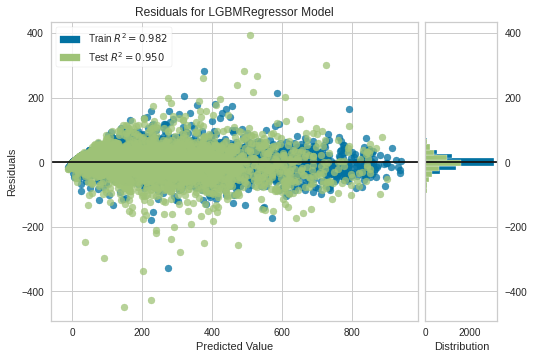

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(tuned_lightgbm)

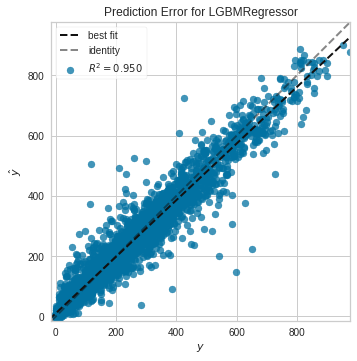

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_lightgbm, plot = 'error')

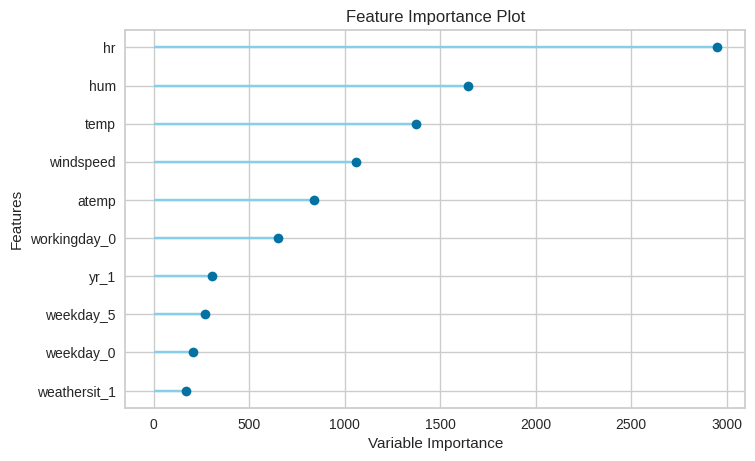

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(tuned_lightgbm, plot='feature')

In [18]:
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,24.6015,1627.4446,40.3416,0.95,0.3764,0.3449


In [20]:
final_lightgbm = finalize_model(tuned_lightgbm)

print(final_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=1

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
predict_model(final_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16.9995,704.0001,26.533,0.9784,0.3139,0.2652


In [22]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23.2041,1515.7784,38.933,0.9565,0.3682,0.3388


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,25.456842
1,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1.182898
2,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,38.529832
3,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,143.285843
4,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,41.236482


In [24]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.9565

In [25]:
save_model(final_lightgbm,'Final LightGBM Model 30Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Final LightGBM Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='cnt',
                                      time_features=[])),
                ('imputer'

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  